# Data Analysis


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('/Users/kundan/Documents/Hackathon/SLHackton2019/unemployment-by-county-us/output.csv')
rates = data['Rate']

In [13]:
data.columns.tolist()

['Year', 'Month', 'State', 'County', 'Rate']

In [14]:
data.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

In [15]:
data.head(5) 

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [16]:
#Length of column
len(data)

885548

In [17]:
rates = data['Rate'].dropna()

In [18]:
data.tail()

,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
Year      885548 non-null int64
Month     885548 non-null object
State     885548 non-null object
County    885548 non-null object
Rate      885548 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [20]:
data.State.nunique()

47

In [21]:
mean_unemp_rate = data.pivot_table("Rate",index=['State'],aggfunc='mean')
high_unemp_state = mean_unemp_rate.sort_values(by='Rate',ascending=False)[:47]
print(high_unemp_state)

                    Rate
State                   
Arizona         9.274588
California      9.045005
Mississippi     8.320517
Michigan        8.136136
West Virginia   8.104809
Washington      8.031513
South Carolina  7.978737
Oregon          7.849271
Louisiana       7.812949
Alabama         7.723844
Tennessee       7.305776
Kentucky        7.238306
New Mexico      7.083895
Ohio            6.923390
Arkansas        6.782210
Nevada          6.737019
North Carolina  6.708099
Illinois        6.548596
Pennsylvania    6.475843
New Jersey      6.422105
Idaho           6.319992
Rhode Island    6.295802
Maine           6.263985
Missouri        6.258425
New York        6.226225
Indiana         5.922725
Texas           5.894519
Maryland        5.866422
Wisconsin       5.815659
Hawaii          5.730401
Massachusetts   5.673611
Connecticut     5.548534
Utah            5.503076
Virginia        5.450772
Minnesota       5.403750
Colorado        5.358946
Montana         5.305418
Oklahoma        5.228062


In [22]:
mean_unemp_year = data.pivot_table("Year",index=['State'],aggfunc='mean')
high_unemp_year = mean_unemp_rate.sort_values(by='Rate',ascending=False)[:47]
print(high_unemp_year)

                    Rate
State                   
Arizona         9.274588
California      9.045005
Mississippi     8.320517
Michigan        8.136136
West Virginia   8.104809
Washington      8.031513
South Carolina  7.978737
Oregon          7.849271
Louisiana       7.812949
Alabama         7.723844
Tennessee       7.305776
Kentucky        7.238306
New Mexico      7.083895
Ohio            6.923390
Arkansas        6.782210
Nevada          6.737019
North Carolina  6.708099
Illinois        6.548596
Pennsylvania    6.475843
New Jersey      6.422105
Idaho           6.319992
Rhode Island    6.295802
Maine           6.263985
Missouri        6.258425
New York        6.226225
Indiana         5.922725
Texas           5.894519
Maryland        5.866422
Wisconsin       5.815659
Hawaii          5.730401
Massachusetts   5.673611
Connecticut     5.548534
Utah            5.503076
Virginia        5.450772
Minnesota       5.403750
Colorado        5.358946
Montana         5.305418
Oklahoma        5.228062


In [23]:
#Calculate  which state and county has highest yearly fluncations
xy = data.pivot_table(values='Rate',index=['Month','State','County'],aggfunc=np.std)
rate_df = xy.reset_index().dropna(subset=['Rate'])
dfx = rate_df.loc[rate_df.groupby('State')['Rate'].idxmax()]
for index,row in dfx.iterrows():
    print("State:",row['State'],"\n ","county:",row['County'],"\n")

State: Alabama 
  county: Wilcox County 

State: Arizona 
  county: Yuma County 

State: Arkansas 
  county: Arkansas County 

State: California 
  county: Imperial County 

State: Colorado 
  county: San Juan County 

State: Connecticut 
  county: Windham County 

State: Delaware 
  county: Sussex County 

State: Hawaii 
  county: Kauai County 

State: Idaho 
  county: Adams County 

State: Illinois 
  county: Boone County 

State: Indiana 
  county: Elkhart County 

State: Iowa 
  county: Winnebago County 

State: Kansas 
  county: Wilson County 

State: Kentucky 
  county: Russell County 

State: Louisiana 
  county: Red River Parish 

State: Maine 
  county: Aroostook County 

State: Maryland 
  county: Worcester County 

State: Massachusetts 
  county: Nantucket County 

State: Michigan 
  county: Mackinac County 

State: Minnesota 
  county: Clearwater County 

State: Mississippi 
  county: Jefferson Davis County 

State: Missouri 
  county: Wayne County 

State: Montana 
  count

# Stastical Data Exploration


In [24]:
# Minimum unemployment rates of the data
minimum_emp_rate = np.min(rates)

# Maximum unemployment rates  of the data
maximum_emp_rate = np.max(rates)

# Mean unemployment rates  of the data
mean_emp_rate = np.mean(rates)

# Median unemployment rates  of the data
median_emp_rate = np.median(rates)

# Standard deviation of unemployment rates of the data
std_emp_rate = np.std(rates)

# Show the calculated statistics
print("Statistics for unemployment rates in dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_emp_rate))
print("Maximum price: ${:,.2f}".format(maximum_emp_rate))
print("Mean price: ${:,.2f}".format(mean_emp_rate))
print("Median price ${:,.2f}".format(median_emp_rate))
print("Standard deviation of prices: ${:,.2f}".format(std_emp_rate))

Statistics for unemployment rates in dataset:

Minimum price: $0.00
Maximum price: $58.40
Mean price: $6.18
Median price $5.50
Standard deviation of prices: $3.11


In [25]:
data.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


# Data Visualization


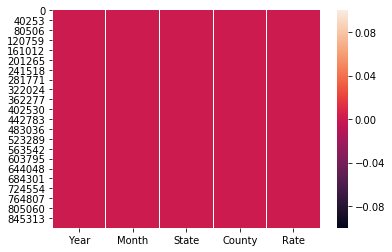

In [26]:
sns.heatmap(data.isnull(),cbar=True)

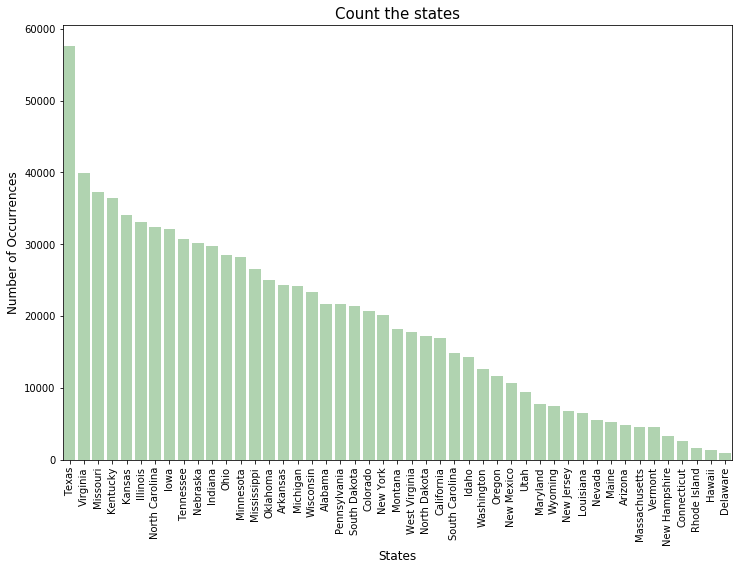

In [27]:
color = sns.color_palette()
cnt_srs = data.State.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.4, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

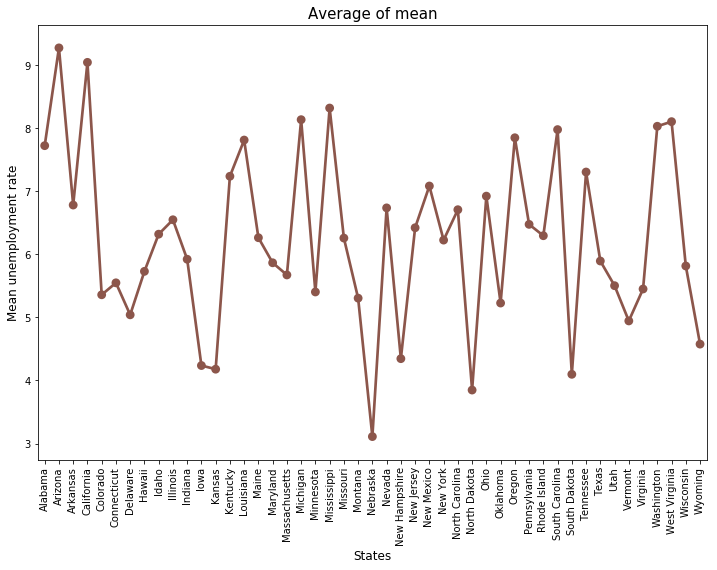

In [28]:
grouped_df = data.groupby(["State"])["Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['State'].values, grouped_df['Rate'].values, alpha=0.8, color=color[5])
plt.ylabel('Mean unemployment rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

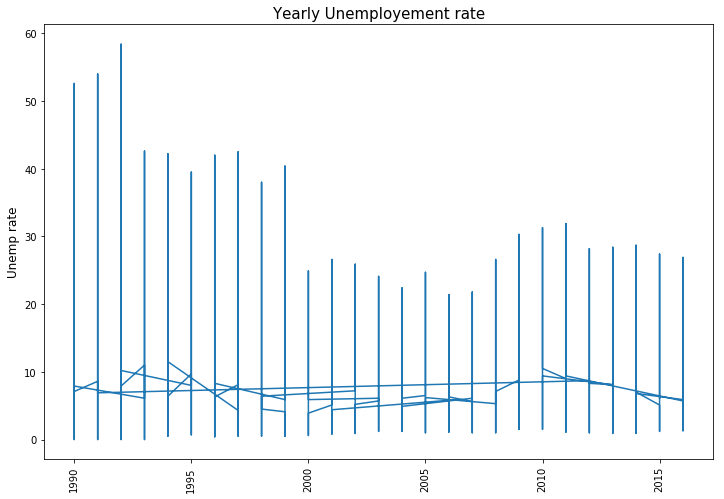

In [44]:
plt.figure(figsize=(12,8))
plt.plot(data['Year'], data['Rate'])
plt.title('Yearly Unemployement rate', fontsize=15)
plt.ylabel('Unemp rate', fontsize=12);
plt.xticks(rotation='vertical')
plt.show();

# Data Model 


Linear Regression Model

In [30]:
X = data.iloc[:,4:].values
y = data.iloc[:,:1].values

In [31]:
print(X)

[[ 6.1]
 [ 9.4]
 [ 7.9]
 ...
 [ 7.5]
 [11.3]
 [ 9. ]]


In [32]:
print(y)

[[2015]
 [2015]
 [2015]
 ...
 [2009]
 [2009]
 [2009]]


In [33]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=1/3,random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y_pred=regressor.predict(X_test)

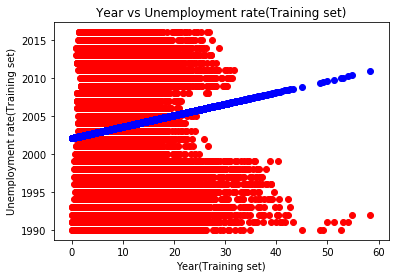

In [36]:
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, regressor.predict(X_train), color='blue')
plt.title('Year vs Unemployment rate(Training set)')
plt.xlabel('Year(Training set)')
plt.ylabel('Unemployment rate(Training set)')
plt.show()

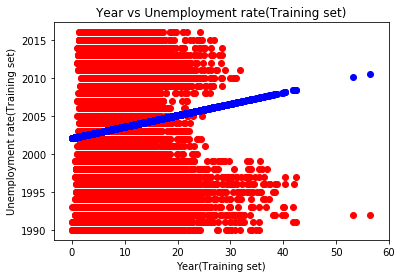

In [37]:
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, regressor.predict(X_test), color='blue')
plt.title('Year vs Unemployment rate(Training set)')
plt.xlabel('Year(Training set)')
plt.ylabel('Unemployment rate(Training set)')
plt.show()

# Interactive Visualization 



In [38]:
!pip install bokeh

In [39]:
from bokeh.plotting import figure, output_file, show

# bokeh
plot =  figure()
plot.scatter(x=data.Year, y=data.Rate)

output_file('test.html')
show(plot)

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
import datetime

In [41]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
p = figure(plot_height=350,
    title="Unemployment rate by Year",
    tools=TOOLS,
    toolbar_location='above')

p.vbar(x=data.Year, top=data.Rate, width=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Average Employment rate'
p.select_one(HoverTool).tooltips = [
    ('Year', '@x'),
    ('Employment rate', '@top'),
]
output_file("barchart.html", title="barchart")
show(p)

In [42]:
!pip install folium

In [7]:
import folium
m = folium.Map(location=[37, -102], zoom_start=5)

AttributeError: module 'folium' has no attribute 'Map'